**USED CAR PRICE PREDICTION (USING DECISION TREE - N.Nandhini)**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cardekho_data.csv')

In [10]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [11]:
df = df.drop('Car_Name', axis=1)

In [12]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [14]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
dt = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,      # change depth to make tree bigger/smaller
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [17]:
y_pred = dt.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 0.8779273324315371
RMSE     : 1.6769064527845978


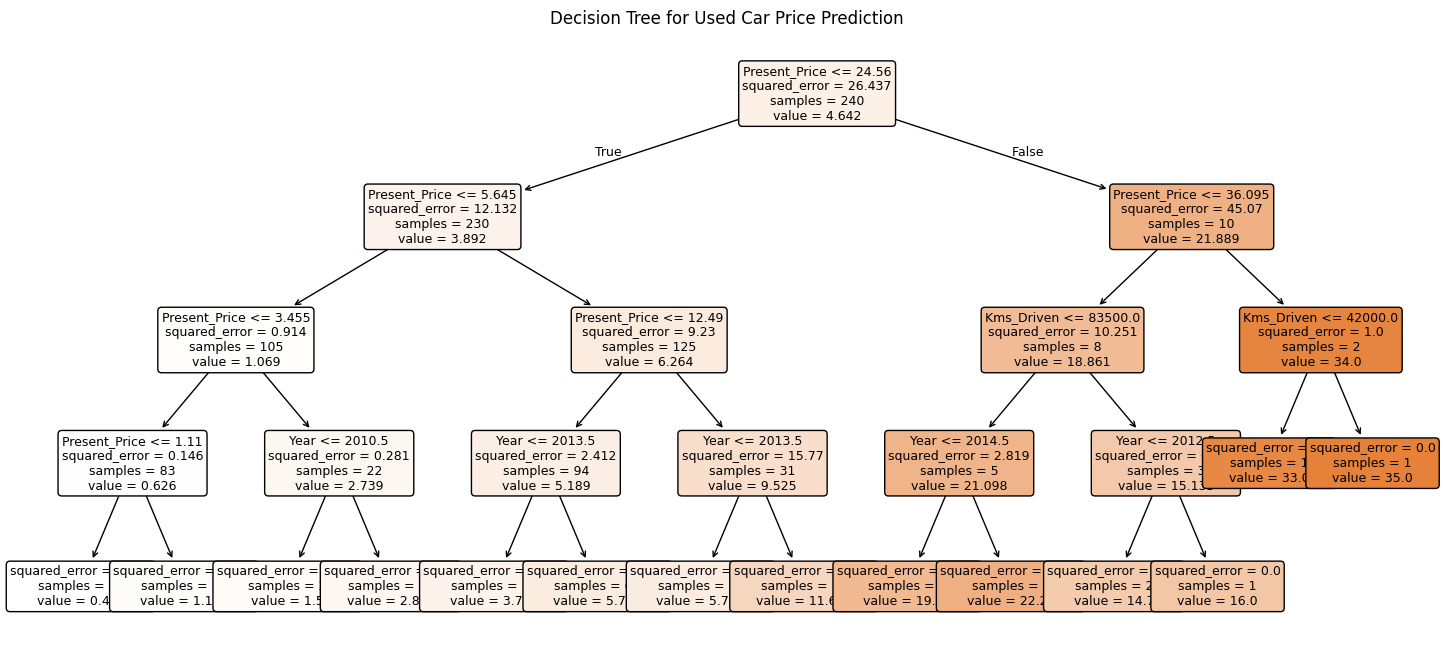

In [18]:
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X.columns,
    filled=True,          # color nodes
    rounded=True,         # rounded boxes
    fontsize=9
)
plt.title("Decision Tree for Used Car Price Prediction")
plt.show()

In [19]:
def get_user_input_and_predict(encoders, model):
    print("\nEnter car details to predict Selling_Price:")

    year = int(input("Year of purchase (e.g., 2015): "))
    present_price = float(input("Present ex-showroom price in lakhs (e.g., 5.5): "))
    kms_driven = int(input("Kilometers driven (e.g., 42000): "))
    owner = int(input("Number of previous owners (0/1/2/3): "))

    fuel_str = input("Fuel_Type (Petrol/Diesel/CNG): ").strip().title()
    seller_str = input("Seller_Type (Dealer/Individual): ").strip().title()
    trans_str = input("Transmission (Manual/Automatic): ").strip().title()

    # encode with the same LabelEncoders
    fuel_enc = encoders['Fuel_Type'].transform([fuel_str])[0]
    seller_enc = encoders['Seller_Type'].transform([seller_str])[0]
    trans_enc = encoders['Transmission'].transform([trans_str])[0]

    # feature order must match X.columns
    sample = [[year, present_price, kms_driven,
               fuel_enc, seller_enc, trans_enc, owner]]

    predicted_price = model.predict(sample)[0]
    print(f"\nPredicted Selling Price of the car: {predicted_price:.2f} lakhs")

In [20]:
get_user_input_and_predict(encoders, dt)



Enter car details to predict Selling_Price:
Year of purchase (e.g., 2015): 2010
Present ex-showroom price in lakhs (e.g., 5.5): 4.5
Kilometers driven (e.g., 42000): 34000
Number of previous owners (0/1/2/3): 1
Fuel_Type (Petrol/Diesel/CNG): Diesel
Seller_Type (Dealer/Individual): Individual
Transmission (Manual/Automatic): Automatic

Predicted Selling Price of the car: 1.50 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [21]:
for col in cat_cols:
    le = encoders[col]
    df[col + '_decoded'] = le.inverse_transform(df[col])